# Deciding Where to Move In NYC by Crime Density
## Visualizing 220,000+ incidents using Pandas and Gmaps.
After working at the UN in New York for a few months in early 2017 I fell in love with the city, and decided that its the perfect place to transition to a career in Data Science. But when I asked people where I should move, a lot of what I heard about which neighborhoods are good and bad seemed either vague or plain contradictory. Luckily NYPD recently started putting every incident report online in an open dataset, so to figure out which neighborhoods are really safe I created a heatmap of crime density for the whole city. (Bonus points for finally building this data portfolio and starting my job hunt in earnest).

## Step 1 | Getting and Cleaning the Data
NYC has an <a href="https://data.cityofnewyork.us/Public-Safety/Crime-Map-/5jvd-shfj/data"> absolutely gorgeous data set</a> in its OpenData repository for all the police incidents over the past several years. New York and San Francisco are both putting a lot of effort into opening up their data, so if you haven't started playing around with yet <a href="https://opendata.cityofnewyork.us/">check it out!</a>

In [1]:
#read the raw csv file and take a look
import pandas as pd
df = pd.read_csv("/Users/ericandresen/data/nyc/Crime_Map_.csv")
print(df.shape)
print(df.columns)
df.head(10)

(227371, 24)
Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',
       'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM',
       'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lat_Lon'],
      dtype='object')


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,417734073,06/30/2017,23:40:00,06/30/2017,23:45:00,06/30/2017,121,CRIMINAL MISCHIEF & RELATED OF,269.0,"MISCHIEF,CRIMINAL, UNCL 2ND",...,90,INSIDE,FAST FOOD,NaN,NaN,1000157.0,194732.0,40.701165,-73.942633,"(40.701165044, -73.942632596)"
1,433995840,06/30/2017,23:20:00,06/30/2017,23:24:00,06/30/2017,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",...,32,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,NaN,1001751.0,241630.0,40.829885,-73.936762,"(40.829884885, -73.936761711)"
2,641950009,06/30/2017,23:16:00,06/30/2017,23:17:00,06/30/2017,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",...,73,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,NaN,1009835.0,184539.0,40.673165,-73.907767,"(40.673164918, -73.90776746)"
3,220585856,06/30/2017,23:15:00,06/30/2017,23:20:00,06/30/2017,105,ROBBERY,366.0,"ROBBERY,BICYCLE",...,9,FRONT OF,FAST FOOD,NaN,NaN,987358.0,204898.0,40.729082,-73.988788,"(40.729082038, -73.988787701)"
4,272762078,06/30/2017,23:10:00,06/30/2017,23:15:00,06/30/2017,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",...,47,FRONT OF,STREET,NaN,NaN,1022347.0,261604.0,40.884643,-73.862225,"(40.884642655, -73.862224781)"
5,203755694,06/30/2017,23:04:00,06/30/2017,23:04:00,06/30/2017,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",...,75,NaN,STREET,NaN,NaN,1020862.0,189449.0,40.686603,-73.867988,"(40.686603007, -73.867988476)"
6,492229929,06/30/2017,23:00:00,NaN,NaN,06/30/2017,353,UNAUTHORIZED USE OF A VEHICLE,462.0,UNAUTHORIZED USE VEHICLE 3,...,90,FRONT OF,STREET,NaN,NaN,1000011.0,194520.0,40.700583,-73.943160,"(40.700583415, -73.943159643)"
7,454291567,06/30/2017,23:00:00,06/30/2017,23:15:00,06/30/2017,359,OFFENSES AGAINST PUBLIC ADMINI,750.0,RESISTING ARREST,...,73,FRONT OF,STREET,NaN,NaN,1008950.0,180855.0,40.663056,-73.910971,"(40.663055675, -73.910971382)"
8,280557625,06/30/2017,23:00:00,06/30/2017,23:10:00,06/30/2017,351,CRIMINAL MISCHIEF & RELATED OF,259.0,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",...,122,FRONT OF,RESIDENCE-HOUSE,NaN,NaN,941080.0,142146.0,40.556737,-74.155358,"(40.556736781, -74.155358237)"
9,954201465,06/30/2017,23:00:00,06/30/2017,23:10:00,06/30/2017,359,OFFENSES AGAINST PUBLIC ADMINI,748.0,"CONTEMPT,CRIMINAL",...,114,NaN,STREET,NaN,NaN,1008020.0,217458.0,40.763525,-73.914194,"(40.763524687, -73.914194293)"


Looks like there are almost 223,000 records and 24 features. From the head its clear that some of these aren't going to be revelevant for our analysis, and there are a few NaN values we need to worry about (a little bit later). Let's use the <a href="https://data.cityofnewyork.us/api/views/5jvd-shfj/files/fc4f191a-6adf-4268-a1ae-8525a8d7027b?download=true&filename=NYPDIncidentLevelDataFootnotes.pdf">codebook </a> to narrow it down. We'll keep:

1. `CMPLNT_FR_DT`, and `CMPLNT_FR_TM`: The date and time of the event. The dataset has both the date/time when the incident started and when it ended - there are more start values and they are more relevant so we'll stick with those. 
2. `OFNS_DESC`: The description of the incidents classification code, so we can filter by type.
3. `LAW_CAT_CD`: Level of offense (felony, misdemeanor, violation)
4. `BORO_NM` and `ADDR_PCT_CD`: Borough and Precinct Numbers where the incident took place to help narrow down the geography.
5. `LOC_OF_OCCUR_DESC`, `PREM_TYP_DESC`: Location of incidenct and the premise type (resident, street, grocery store, etc.) 
6. `PARKS_NM`: Name of Park incidence occured in
7. `Latitude` and `Longitude` so we can map them.

In [2]:
#combine and convert the date and time of the event to datetime format
df["DATE_TIME"] = df["CMPLNT_FR_DT"] + ' ' + df["CMPLNT_FR_TM"]
df["DATE_TIME"] = pd.to_datetime(df["DATE_TIME"], format="%m/%d/%Y %H:%M:%S", errors="coerce")

#filter by relevant columns
cols = ["DATE_TIME", "BORO_NM", "OFNS_DESC", "PD_DESC", "LAW_CAT_CD", "ADDR_PCT_CD", "LOC_OF_OCCUR_DESC", "PREM_TYP_DESC", "PARKS_NM", "Latitude", "Longitude"]
crime_data = df[cols]

#drop NaN values for time and location 
print(crime_data.shape)
crime_data = crime_data.dropna(subset=["DATE_TIME","Latitude", "Longitude"])
print(crime_data.shape)

#verify by looking at it
crime_data.head()

(227371, 11)
(223373, 11)


,DATE_TIME,BORO_NM,OFNS_DESC,PD_DESC,LAW_CAT_CD,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,Latitude,Longitude
0,2017-06-30 23:40:00,BROOKLYN,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF,CRIMINAL, UNCL 2ND",FELONY,90,INSIDE,FAST FOOD,NaN,40.701165,-73.942633
1,2017-06-30 23:20:00,MANHATTAN,HARRASSMENT 2,"HARASSMENT,SUBD 1,CIVILIAN",VIOLATION,32,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,40.829885,-73.936762
2,2017-06-30 23:16:00,BROOKLYN,DANGEROUS DRUGS,"MARIJUANA, POSSESSION 4 & 5",MISDEMEANOR,73,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,40.673165,-73.907767
3,2017-06-30 23:15:00,MANHATTAN,ROBBERY,"ROBBERY,BICYCLE",FELONY,9,FRONT OF,FAST FOOD,NaN,40.729082,-73.988788
4,2017-06-30 23:10:00,BRONX,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",VIOLATION,47,FRONT OF,STREET,NaN,40.884643,-73.862225


Now that the dates are in datetime format we can explore the data a little more and make sure its evenly distributed over time and geography.

In [3]:
print(crime_data["BORO_NM"].value_counts())
print(crime_data["DATE_TIME"].dt.year.value_counts())

BROOKLYN         65280
MANHATTAN        54078
BRONX            49942
QUEENS           43817
STATEN ISLAND    10256
Name: BORO_NM, dtype: int64
2017    215484
2016      6879
2015       445
2014       231
2013        88
2012        84
2011        38
2010        32
2007        20
2009        16
2008        12
2001         7
2004         6
2005         5
2006         4
2003         3
2002         3
2000         2
1996         2
1917         2
1977         2
1998         1
1997         1
1916         1
1993         1
1990         1
1986         1
1984         1
1983         1
Name: DATE_TIME, dtype: int64


2017 has the most data by far, which makes sense given how recent the NY Open Data initiative started hosting this data. Let's filter out everything that is before 2016 as well as anything that was coerced to Nan in the conversion to datetime, or that doesn't have location data.

In [4]:
#filter by year and check that distribution across the boroughs is still comparable
crime_data = crime_data[crime_data["DATE_TIME"].dt.year >= 2016]
print(crime_data["DATE_TIME"].dt.year.value_counts())
print(crime_data["BORO_NM"].value_counts())

2017    215484
2016      6879
Name: DATE_TIME, dtype: int64
BROOKLYN         64994
MANHATTAN        53829
BRONX            49757
QUEENS           43569
STATEN ISLAND    10214
Name: BORO_NM, dtype: int64


It's interesting that Brooklyn has more incidents than Manhattan, but given the difference in size I'm surprised that the difference isn't higher. Then again Manhattan is much denser, so who knows how this actually shakes out. As a side project it would be interesting to normalize this by population to see what has the higher incident rate. The most importan things is there is plenty of data across Boroughs for meaningful analysis. 

There are so many fewer incidents in 2016 it's clear that only a small number of incidents are accounted for in the data. It's also important to note that 2017 isn't over, so this difference will actually be even greater by the end of the year.

This makes me wonder if there is a bias in the 2016 results. For example, maybe only more serious crimes were recorded in 2016, or maybe the data ramped up towards the end of the year. Let's make a few charts to explore.  

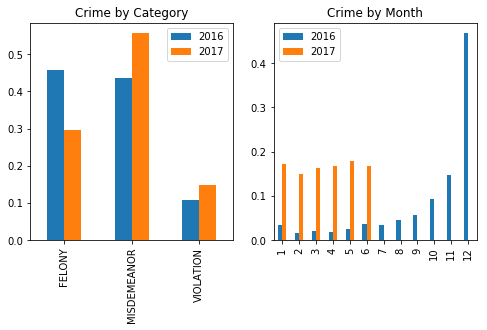

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#get crime by category for each year and normalize to percent (make comparable across years)
categories_2017 = crime_data[crime_data["DATE_TIME"].dt.year == 2017]["LAW_CAT_CD"].value_counts()
total_2017 = sum(categories_2017)
categories_percent_2017 = categories_2017 / total_2017

categories_2016 = crime_data[crime_data["DATE_TIME"].dt.year == 2016]["LAW_CAT_CD"].value_counts()
total_2016 = sum(categories_2016)
categories_percent_2016 = categories_2016/total_2016

#make grouped bargraph
pd.concat([categories_percent_2016.rename("2016"), categories_percent_2017.rename("2017")], axis=1).plot.bar(ax=ax1)
ax1.set_title("Crime by Category")

#then do the same by monthly occurence
#normalizing by percent isn't strictly necessary, but its a little hack to make it easier to read
by_month_2017 = crime_data[crime_data["DATE_TIME"].dt.year == 2017]["DATE_TIME"].dt.month.value_counts().sort_index()
by_month_2016 = crime_data[crime_data["DATE_TIME"].dt.year == 2016]["DATE_TIME"].dt.month.value_counts().sort_index()

by_month_percent_2017 = by_month_2017 / total_2017
by_month_percent_2016 = by_month_2016 / total_2016

pd.concat([by_month_percent_2016.rename("2016"), by_month_percent_2017.rename("2017")], axis=1).plot.bar(ax=ax2)
ax2.set_title("Crime by Month")

It looks like felony's might be over represented in 2016, but more importantly it's fairly obvious that more comprehensive reporting was phased in during the last few months of the year. In other words December 2016 has way more data than the rest of the year, which means December will totally ovewhelm the other months. We'll drop 2016 and just focus on the first 6 months that we have for this year.

This only leaves us with data for the first six months of 2017, which isn't ideal, but the upside is it looks like the number of incidents has stayed fairly consistent across that time. We can plot some of the numbers from 2015 as a spot check to make sure crime rates are fairly stable across the year.

0.020300981574879005


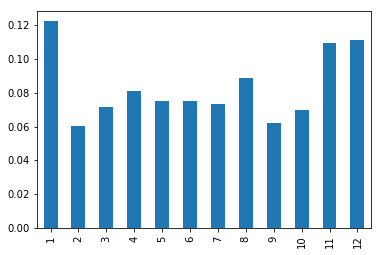

In [6]:
#plot 2015 crime by month normalized to percent to make scale of difference easier to judge
crime_2015 = df[cols][df["DATE_TIME"].dt.year == 2015]
by_month_percent_2015 = crime_2015["DATE_TIME"].dt.month.value_counts().sort_index() / crime_2015.shape[0]
by_month_percent_2015.plot.bar()
print(by_month_percent_2015.std())

There are spikes at the beginning and end of the year, which don't seemt to be replicatd in the 2017 data. But overall this is consisent enough to make me feel comfortable extrapolating out the data we have from 2017 so far.

In [7]:
#filter to only include 2017
crime_data = crime_data[crime_data["DATE_TIME"].dt.year == 2017]
crime_data.shape

(215484, 11)

Now it's time to look at offenses. Not all offenses represent risk factors. Lower level offenses like traffic citations aren't predictors of danger and will cloud the map from representing what we want it to. On the other hand just using the level of offense isn't enough. Harrassment, for example, is considered a low level offense, violation, but there's a lot that can be called harrassment that is still a risk factor. 

In [8]:
#list unique values in offense description
crime_data["OFNS_DESC"].sort_values().unique()

array(['ADMINISTRATIVE CODE', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
       'ALCOHOLIC BEVERAGE CONTROL LAW', 'ANTICIPATORY OFFENSES', 'ARSON',
       'ASSAULT 3 & RELATED OFFENSES', "BURGLAR'S TOOLS", 'BURGLARY',
       'CHILD ABANDONMENT/NON SUPPORT', 'CRIMINAL MISCHIEF & RELATED OF',
       'CRIMINAL TRESPASS', 'DANGEROUS DRUGS', 'DANGEROUS WEAPONS',
       'DISORDERLY CONDUCT', 'DISRUPTION OF A RELIGIOUS SERV',
       'ENDAN WELFARE INCOMP', 'ESCAPE 3', 'FELONY ASSAULT', 'FORGERY',
       'FRAUDS', 'FRAUDULENT ACCOSTING', 'GAMBLING', 'GRAND LARCENY',
       'GRAND LARCENY OF MOTOR VEHICLE', 'HARRASSMENT 2',
       'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'HOMICIDE-NEGLIGENT-VEHICLE',
       'INTOXICATED & IMPAIRED DRIVING', 'INTOXICATED/IMPAIRED DRIVING',
       'JOSTLING', 'KIDNAPPING', 'KIDNAPPING & RELATED OFFENSES',
       'LOITERING/GAMBLING (CARDS, DIC', 'MISCELLANEOUS PENAL LAW',
       'MURDER & NON-NEGL. MANSLAUGHTER', 'NEW YORK CITY HEALTH CODE',
       'NYS LAWS-UNCLASSIFIED F

Most of these look like crimes that represent real risk. But there are two that might cloud the data:

1. <a href="https://dmv.ny.gov/about-dmv/order-copy-nys-vehicle-and-traffic-law">'VEHICLE AND TRAFFIC LAWS'</a> - Traffic citations will make crime seem higher where traffic citations are disproportionately high (e.g. Manhattan?), and intuitively they aren't a strong correlate to crime, so we'll drop.
2. <a href="http://codes.findlaw.com/ny/alcoholic-beverage-control-law/abc-sect-130.html">'ALCOHOLIC BEVERAGE CONTROL LAW'</a> - Dropped because selling alcohol without a license isn't a risk factor.

The big debate for me was Marijuana which is nested in the Dangerous Drugs category. Marijuana is scientifically not dangerous and shouldn't be illegal to start with, but for now I'll to keep it. I don't have enough hard data on how these types of charges correlate to crime beyond my personal bias against criminality.

In [9]:
#filter out the above
bool_list = crime_data["OFNS_DESC"].isin(['VEHICLE AND TRAFFIC LAWS', 'ALCOHOLIC BEVERAGE CONTROL LAW']) == False
crime_data = crime_data[bool_list]
#verify
#crime_data["OFNS_DESC"].sort_values().unique()

# Step 2 | Map it!

The goal is to see how crime is distrubuted throughout the city, so I'm using the <a href="http://jupyter-gmaps.readthedocs.io/en/latest/gmaps.html#heatmaps"> Jupyter Gmaps </a> module to plot these incidents as a heat map on top of an interactive map of New York. Green is low incident density and red is higher. The first map I made was a total mush of red at a high altitude and totally green when closer in (keep in mind visual density changes in proportion to perspective), so I also changed the intensity and the radius of each reported crime until the map was more comprehensible. 

*(Unfortunately github won't host these maps so I've substituted them with pictures. If you fork this code and put in your own api key you can see these maps interactively.)* 

In [19]:
import os
import gmaps
#API key hidden with environmental variable
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])

#set initial frame
new_york_coordinates = (40.75, -74.00)

fig = gmaps.figure(center=new_york_coordinates, zoom_level=12)
locations = crime_data[["Latitude","Longitude"]]
heatmap_layer = gmaps.heatmap_layer(locations)

#adjust red to make more understandable
heatmap_layer.max_intensity = 35
heatmap_layer.point_radius = 5

fig.add_layer(heatmap_layer)

fig

Figure()

It's important to remember that this map equally weights each incident, so red means crime is more dense, not more serious. It's also important to remember that Manhattan is more dense, so this map doesn't necessarily mean that crime is higher per person in Manhattan. But, in this case we don't care about crime per person we care about geographical density of crime because regardless of how many people live around you, you want to know how dangerous it is to walk down the street.

If you zoom into midtown you can see that there are hotspots around the touristy areas of town - specifically around Times Square and the Empire State Building. If you move further west into hells kitchen, crime drops. Where as if you go the other direction there's mid level density around second street and a cluster around Trump tower. 

Given the last year it makes me wonder if this is a lot of low level offenses from protests around that area. Moving further north its clear that the Upper East Side is fairly safe, but once you get into east harlem, things start looking a lot more red. No real surprises there. Interestingly the west side of 14th street has considerably higher density than the west side, which goes into the over all quite safe east village. Any ideas why that might be (message me). There is an interesting hotspot formed just south of there in the box formed between E. Houston, Allen, and Essex Streets, which jives with my experience from when I was living south of there, but it still makes me quite curious as to why its so concentrated there. If memory serves right that area and east of there are lower income areas (something to look at in a future project).

There are similarly predictable patterns in Brooklyn with a few surprises mixed in. Williamsburg is fairly safe. It was surprising to me how safe Bushwick and Ridgewood are, but there is a definite cluster at the border between Williamsburg and Bushwick at Broadway Triangle. I don't know this area too well, but it's very interesting that there is a cluster of crime between two relatively peacful areas rather than in the slightly more risky area directly to the south. 

The area I'm really interested is in the Prospect Park region. My girlfriend lives there, and I'm looking at apartments in the area with my sister. The original inspiration for this visualization was all of the rumors I had heard about the area. Some of it was certaintly true, but the rest of it seemed to be a mix of out dated information, anecdotal evidence, and racial stereotypes, which virginia tech's (really cool)<a href="https://demographics.virginia.edu/DotMap/">racial dot map</a> confirms are true, atleast in the the sense that Crown Heights is overwhelmingly black (compare this with Park Slope on the other side). In this respect, this map is fascinating. You can see Park Slope is quite peaceful, where as you can follow Flatbush Ave. down the other side and see an almost perfect gradient to the stereotypically dangerous neighborhood at Prospect Park's south east corner. What's especially interesting is that the north side of the Prospect Lefferts Garden neighborhood is  a relatively low risk island between Brownsville to the north east and East Flatbush to its south west. This whole area has a rough reputation, but in reality crime is only clustering into specific areas. 

Equally as interesting is the north side of the park, which is just starting to gentrify. It's almost as if Park Slope is creeping across the north side of the park, boxed in by Fulton to the north and slowly chipping away at New York Ave to the east. This is really where I wish I had better historical data so that we could see if incident density over the past few years supports this. 

The major problem with these conclusions (besides the fact that I'm wildly extrapolating data from a few months of crime), is that this map treats all crime the same. In other words disorderly conduct will have the same effect on our perception of density as a double homicide. So our next step is to make sure hotspots aren't being drowned out by lower level crime. I have a hunch we'll see the same general pattern. There are several ways to test this. I could weight more serious crimes so that they have a higher intensity on the map (i.e. will make areas redder faster). But it would still be difficult to tell exactly what the differences are if they are small, especially with such a large area to cover. The opposite extreme is seperating out the data completely so we can get a clean read, but this has the opposite problem of decontextualizing felonies from the overall pattern of crime. A good data visualization is all about making things as easy to grasp as possible, so I'm going to add another layer on top of the existing map to emphasize more serious crimes in a different color - black.  

In [37]:
#seperate data into felony and non-felony offenses
felonies = crime_data[crime_data["LAW_CAT_CD"] == "FELONY"]
crime_data_wo_felonies = crime_data[crime_data["LAW_CAT_CD"] != "FELONY"]

gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])

new_york_coordinates = (40.75, -74.00)

fig = gmaps.figure(center=new_york_coordinates, zoom_level=12)

#map non-felonies
locations = crime_data_wo_felonies[["Latitude","Longitude"]]
heatmap_layer = gmaps.heatmap_layer(locations)
heatmap_layer.max_intensity = 50
heatmap_layer.point_radius = 5
fig.add_layer(heatmap_layer)

#map felonies
felony_locations = felonies[["Latitude","Longitude"]]
felony_layer = gmaps.heatmap_layer(felony_locations)
felony_layer.gradient = [
    (200, 200, 200, 0.0),
    (0, 0, 0, 1.0),
    (0, 0, 0, 1.0)
]
felony_layer.max_intensity = 75 #compare 20 and 25
felony_layer.point_radius = 5
fig.add_layer(felony_layer)

fig

Figure()

It's not too surprising that felonies occur in the same areas that crime in general does. But if you look closely a trend emerges. Felonies are most dense, that is to say most likely, in areas where overall crime is the densest. This raises interesting questions about whether lower level crimes are predictive of more serious, violent crimes. If this is the case then that means there are "gateway" crimes or multiplier effects of low level crime that lead to more serious offenses. Intuitively this makes sense. For the most part when we think of a "bad" part of town we think of it as holistically bad, not just bad in one respect. What we don't think about is that in itself is an odd thing to assume and it represents a ghettoization both literally and figuritively of dangerous areas. I'm sure there are studies on this, so if you know any I'd love for you send them my way! (UPDATE: A friend of mine told me that this is known as the broken windows theory) 

Finally its interesting to notice that some of my earlier assumptions about crime in touristy areas being unserious doesn't seem to be the case. There are still high density of felonies around Times Square and the Empire State Building, which makes me want to drill down further into the data to find out what they are. For now though, the visualization has served its purpose in getting context about where are good and bad areas to look for a place to live. Now all I have to do is add a few lines of code to add prospective places as markers on the map. Thanks for following along! 

### UPDATE: Moving In
Since I first made this map, I've used it to find a great little place in Crown Heights. I've also started talks with my small home town to use similar techniques on their internal data to help them better understand geographical patterns of gang violence. In the meantime I'm looking for a data driven job in NYC, drop me a line if you know of anything!